<a href="https://colab.research.google.com/github/19rehan/ML-Projects/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Trees

#Objectives
After completing this lab you will be able to:

Develop a classification model using Decision Tree Algorithm
Apply Decision Tree classification on a real world dataset.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv(path)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [10]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [19]:
label_encoder = LabelEncoder()
my_data['Sex'] = label_encoder.fit_transform(my_data['Sex'])
my_data['BP'] = label_encoder.fit_transform(my_data['BP'])
my_data['Cholesterol'] = label_encoder.fit_transform(my_data['Cholesterol'])
my_data['Drug'] = label_encoder.fit_transform(my_data['Drug'])

In [20]:
my_data.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [21]:
custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
my_data['Drug_num'] = my_data['Drug'].map(custom_map)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,4,NaN
1,47,1,1,0,13.093,2,NaN
2,47,1,1,0,10.114,2,NaN
3,28,0,2,0,7.798,3,NaN
4,61,0,1,0,18.043,4,NaN
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,2,NaN
196,16,1,1,0,12.006,2,NaN
197,52,1,2,0,9.894,3,NaN
198,23,1,2,1,14.020,3,NaN


In [28]:
my_data.drop('Drug',axis=1).corr()['Drug_num']

,Drug_num
Age,NaN
Sex,NaN
BP,NaN
Cholesterol,NaN
Na_to_K,NaN
Drug_num,NaN


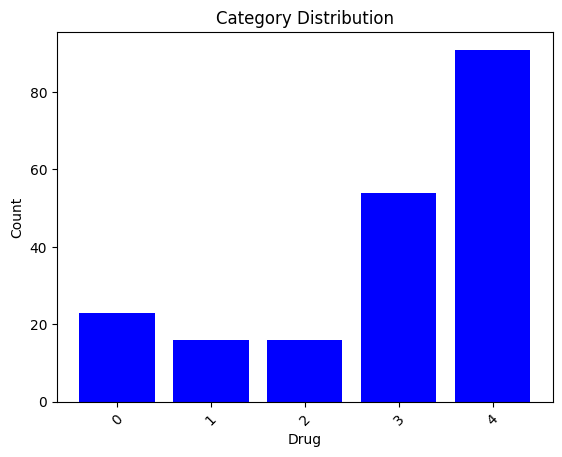

In [29]:
category_counts = my_data['Drug'].value_counts()

# Plot the count plot
plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

In [34]:
X = my_data.drop(['Drug','Drug_num'],axis = 1)
y = my_data['Drug']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 32)

In [37]:
drug_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
drug_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
tree_predictions = drug_tree.predict(X_test)

In [41]:
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_test, tree_predictions))

Decision Trees's Accuracy:  0.9833333333333333
